# CIFAR-10 dataset classification with CNNs

Author: Tanwi Mallick, adapting codes from Bethany Lusch, Prasanna Balprakash, Corey Adams, and Kyle Felker

In this notebook, we'll continue the CIFAR-10 problem using the Keras API (as included in the TensorFlow library) and incorporating convolutional layers.

First, the needed imports.

In [1]:
%matplotlib inline

import tensorflow as tf

import numpy
import matplotlib.pyplot as plt
import time

## CIFAR-10 data set

Again we'll load the cifar10 data set. CIFAR-10 dataset contains 32x32 color images from 10 classes: airplane, automobile, bird, cat, deer, dog, frog, horse, ship, truck. If you haven't downloaded it already, it could take a while.

In [2]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()
x_train = x_train.astype(numpy.float32)
x_test  = x_test.astype(numpy.float32)

x_train /= 255.
x_test  /= 255.

y_train = y_train.astype(numpy.int32)
y_test  = y_test.astype(numpy.int32)

This time we won't flatten the images. 

The training data (`X_train`) is a 4th-order tensor of size (50000, 32, 32, 3), i.e. it consists of 50000 images of size 32x32 pixels with 3 colors each. 

`y_train` is a 50000-dimensional vector containing the correct classes ('airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck') for each training sample.

## Convolutional neural network (CNN)

CNN is a type of deep learning model for processing data that has a grid pattern, such as images.

Let's use a small model that includes convolutional layers

- The Conv2D layers operate on 2D matrices so we input the images directly to the model.
    - The two Conv2D layers below learn 32 and 64 filters respectively. 
    - They are learning filters for 3x3 windows.
- The MaxPooling2D layer reduces the spatial dimensions, that is, makes the image smaller.
    - It downsamples by taking the maximum value in the window 
    - The pool size of (2, 2) below means the windows are 2x2. 
    - Helps in extracting important features and reduce computation
- The Flatten layer flattens the 2D matrices into vectors, so we can then switch to Dense layers as in the MLP model.

See https://keras.io/layers/convolutional/, https://keras.io/layers/pooling/ for more information.

![conv layer](images/conv_layer.png)
Image credit: [Jason Brownlee](https://machinelearningmastery.com/convolutional-layers-for-deep-learning-neural-networks/)

![conv layer](images/conv.png)
Image credit: [Anh H. Reynolds](https://anhreynolds.com/blogs/cnn.html)


<img src="images/MaxpoolSample2.png" width="600" hight="600" align="left"/>

In [3]:
class CIFAR10Classifier(tf.keras.models.Model):

    def __init__(self, activation=tf.nn.tanh):
        tf.keras.models.Model.__init__(self)

        self.conv_1 = tf.keras.layers.Conv2D(32, [3, 3], activation='relu')
        self.conv_2 = tf.keras.layers.Conv2D(64, [3, 3], activation='relu')
        self.pool_3 = tf.keras.layers.MaxPooling2D(pool_size=(2, 2))
        self.drop_4 = tf.keras.layers.Dropout(0.25)
        self.dense_5 = tf.keras.layers.Dense(128, activation='relu')
        self.drop_6 = tf.keras.layers.Dropout(0.5)
        self.dense_7 = tf.keras.layers.Dense(10, activation='softmax')

    def call(self, inputs):

        x = self.conv_1(inputs)
        x = self.conv_2(x)
        x = self.pool_3(x)
        x = self.drop_4(x)
        x = tf.keras.layers.Flatten()(x)
        x = self.dense_5(x)
        x = self.drop_6(x)
        x = self.dense_7(x)

        return x

### Simple training

Here is a concise way to train the network, like we did in the previous notebook. We'll see a more verbose approach below that allows more performance tuning.

In [4]:
def train_network_concise(_batch_size, _n_training_epochs, _lr):

    cnn_model = CIFAR10Classifier()

    cnn_model.compile(loss="sparse_categorical_crossentropy", optimizer="adam", metrics=['accuracy'])
    
    history = cnn_model.fit(x_train, y_train, batch_size=_batch_size, epochs=_n_training_epochs)
    return history, cnn_model

In [5]:
# This took 43 seconds per epoch on my laptop
batch_size = 512
epochs = 30
lr = .01
history, cnn_model = train_network_concise(batch_size, epochs, lr)

2022-11-07 10:14:42.927601: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:306] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2022-11-07 10:14:42.927722: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:272] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


Metal device set to: Apple M1 Pro

systemMemory: 32.00 GB
maxCacheSize: 10.67 GB

Epoch 1/30


2022-11-07 10:14:43.489040: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
2022-11-07 10:14:43.831498: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


98/98 [==============================] - 5s 43ms/step - loss: 1.7956 - accuracy: 0.3474
Epoch 2/30
98/98 [==============================] - 4s 42ms/step - loss: 1.4235 - accuracy: 0.4902
Epoch 3/30
98/98 [==============================] - 4s 42ms/step - loss: 1.2710 - accuracy: 0.5474
Epoch 4/30
98/98 [==============================] - 4s 42ms/step - loss: 1.1716 - accuracy: 0.5859
Epoch 5/30
98/98 [==============================] - 4s 42ms/step - loss: 1.1045 - accuracy: 0.6091
Epoch 6/30
98/98 [==============================] - 4s 42ms/step - loss: 1.0480 - accuracy: 0.6279
Epoch 7/30
98/98 [==============================] - 4s 42ms/step - loss: 0.9984 - accuracy: 0.6477
Epoch 8/30
98/98 [==============================] - 4s 42ms/step - loss: 0.9611 - accuracy: 0.6601
Epoch 9/30
98/98 [==============================] - 4s 43ms/step - loss: 0.9341 - accuracy: 0.6707
Epoch 10/30
98/98 [==============================] - 4s 42ms/step - loss: 0.9066 - accuracy: 0.6787
Epoch 11/30
98/98 [=

Accuracy for test data.  The model should be better than the non-convolutional model even if you're only patient enough for three epochs. 

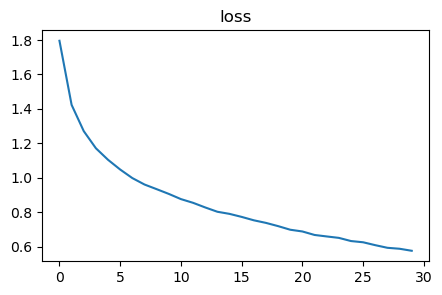

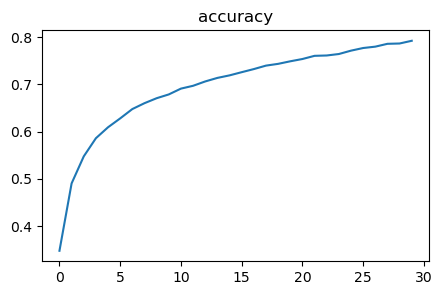

In [6]:
plt.figure(figsize=(5,3))
plt.plot(history.epoch,history.history['loss'])
plt.title('loss')

plt.figure(figsize=(5,3))
plt.plot(history.epoch,history.history['accuracy'])
plt.title('accuracy');

### Inference

With enough training epochs, the test accuracy should exceed 96.53%.

You can compare your result with the state-of-the art [here](http://rodrigob.github.io/are_we_there_yet/build/classification_datasets_results.html). 

In [7]:
%%time
x_test_reshaped = numpy.expand_dims(x_test, -1)
scores = cnn_model.evaluate(x_test, y_test, verbose=2)
print("%s: %.2f%%" % (cnn_model.metrics_names[1], scores[1]*100))

2022-11-07 10:17:08.727723: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


313/313 - 2s - loss: 0.8522 - accuracy: 0.7154 - 2s/epoch - 7ms/step
accuracy: 71.54%
CPU times: user 1.22 s, sys: 853 ms, total: 2.08 s
Wall time: 2.24 s


We can also again check the confusion matrix

In [8]:
from sklearn.metrics import confusion_matrix

print('Confusion matrix (rows: true classes; columns: predicted classes):'); print()
predictions = cnn_model.predict(x_test)
cm=confusion_matrix(y_test, numpy.argmax(predictions, axis=1), labels=list(range(10)))
print(cm); print()

print('Classification accuracy for each class:'); print()
for i,j in enumerate(cm.diagonal()/cm.sum(axis=1)): print("%d: %.4f" % (i,j))

Confusion matrix (rows: true classes; columns: predicted classes):

 48/313 [===>..........................] - ETA: 0s

2022-11-07 10:17:23.156838: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


313/313 [==============================] - 1s 5ms/step
[[788  26  44  25   9   4   9   9  46  40]
 [ 29 831   3   8   1   3   7   2  10 106]
 [ 78  10 544  63  86  94  69  33  10  13]
 [ 27  16  77 541  55 165  58  30  12  19]
 [ 33   5  69  78 641  29  64  68   9   4]
 [ 16   5  56 162  39 640  15  47   8  12]
 [  6   9  36  75  30  25 805   7   5   2]
 [ 13   5  30  41  54  63   6 770   0  18]
 [ 86  52   9  14   5   8   5   2 770  49]
 [ 34  76   7   8   6   5   3  18  19 824]]

Classification accuracy for each class:

0: 0.7880
1: 0.8310
2: 0.5440
3: 0.5410
4: 0.6410
5: 0.6400
6: 0.8050
7: 0.7700
8: 0.7700
9: 0.8240


### More verbose training

This approach explicitly handles the looping over data. It will be helpful in future weeks for diving in and optimizing

In [9]:
def compute_loss(y_true, y_pred):
    # if labels are integers, use sparse categorical crossentropy
    # network's final layer is softmax, so from_logtis=False
    scce = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False)
    # if labels are one-hot encoded, use standard crossentropy

    return scce(y_true, y_pred)  

In [10]:
def forward_pass(model, batch_data, y_true):
    y_pred = model(batch_data)
    loss = compute_loss(y_true, y_pred)
    return loss

In [11]:
# Here is a function that will manage the training loop for us:

def train_loop(batch_size, n_training_epochs, model, opt):
    
    @tf.function()
    def train_iteration(data, y_true, model, opt):
        with tf.GradientTape() as tape:
            loss = forward_pass(model, data, y_true)

        trainable_vars = model.trainable_variables

        # Apply the update to the network (one at a time):
        grads = tape.gradient(loss, trainable_vars)

        opt.apply_gradients(zip(grads, trainable_vars))
        return loss

    for i_epoch in range(n_training_epochs):
        print("beginning epoch %d" % i_epoch)
        start = time.time()

        epoch_steps = int(50000/batch_size)
        dataset.shuffle(50000) # Shuffle the whole dataset in memory
        batches = dataset.batch(batch_size=batch_size, drop_remainder=True)
        
        for i_batch, (batch_data, y_true) in enumerate(batches):
            batch_data = tf.reshape(batch_data, [-1, 32, 32, 3])
            loss = train_iteration(batch_data, y_true, model, opt)
            
        end = time.time()
        print("took %1.1f seconds for epoch #%d" % (end-start, i_epoch))

In [12]:
def train_network(_batch_size, _n_training_epochs, _lr):

    cifar_model = CIFAR10Classifier()

    opt = tf.keras.optimizers.Adam(_lr)

    train_loop(_batch_size, _n_training_epochs, cifar_model, opt)

In [13]:
dataset = tf.data.Dataset.from_tensor_slices((x_train, y_train))
dataset.shuffle(50000)

batch_size = 512
epochs = 3
lr = .01
train_network(batch_size, epochs, lr)

beginning epoch 0


2022-11-07 10:19:22.159650: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


took 4.1 seconds for epoch #0
beginning epoch 1
took 3.8 seconds for epoch #1
beginning epoch 2
took 3.8 seconds for epoch #2


# Homework: improve the accuracy of this model

Update this notebook to ensure more accuracy. How high can it be raised? Changes like increasing the number of epochs, altering the learning rate, altering the number of neurons the hidden layer, chnaging the optimizer, etc. could be made directly in the notebook. You can also change the model specification by expanding the network's layer. The current notebook's training accuracy is roughly 58.06%, although it varies randomly.

# Solution
As with the assignment from the previous week, the network in the notebook above is not close to fully trained. To increase the accuracy to ~78%, training is done over fifty epochs with a smaller batch size and a higher learning rate. I've also added an extra convolutional layer and dropout layer to the architecture, but it's unclear that this is having a major effect on the final accuracy.

In [21]:
###
# New Architecture
###
class NewCIFAR10Classifier(tf.keras.models.Model):

    def __init__(self, activation=tf.nn.tanh):
        tf.keras.models.Model.__init__(self)

        # Initial convolutional layers (same as above)
        self.conv_1 = tf.keras.layers.Conv2D(32, [3, 3], activation='relu')
        self.conv_2 = tf.keras.layers.Conv2D(64, [3, 3], activation='relu')
        self.pool_3 = tf.keras.layers.MaxPooling2D(pool_size=(2, 2))

        # Inserted an extra convolutional layer and pooling layer
        self.conv_4 = tf.keras.layers.Conv2D(64, [3, 3], activation='relu')
        self.pool_5 = tf.keras.layers.MaxPooling2D(pool_size=(2, 2))

        # Final dense layers (same as above)
        self.drop_6 = tf.keras.layers.Dropout(0.25)
        self.dense_7 = tf.keras.layers.Dense(128, activation='relu')
        self.drop_8 = tf.keras.layers.Dropout(0.5)
        self.dense_9 = tf.keras.layers.Dense(10, activation='softmax')

    def call(self, inputs):

        x = self.conv_1(inputs)
        x = self.conv_2(x)
        x = self.pool_3(x)

        x = self.conv_4(x)
        x = self.pool_5(x)

        x = tf.keras.layers.Flatten()(x)

        x = self.drop_6(x)
        x = self.dense_7(x)
        x = self.drop_8(x)
        x = self.dense_9(x)

        return x

###
# New training parameters
###
batch_size = 256
epochs = 50
lr = .03

cnn_model = NewCIFAR10Classifier()
cnn_model.compile(loss="sparse_categorical_crossentropy", optimizer="adam", metrics=['accuracy'])
history = cnn_model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs)

Epoch 1/50


2022-11-07 11:12:56.352537: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


196/196 [==============================] - 6s 28ms/step - loss: 1.7462 - accuracy: 0.3620
Epoch 2/50
196/196 [==============================] - 5s 27ms/step - loss: 1.3746 - accuracy: 0.5050
Epoch 3/50
196/196 [==============================] - 5s 27ms/step - loss: 1.2098 - accuracy: 0.5703
Epoch 4/50
196/196 [==============================] - 5s 26ms/step - loss: 1.1001 - accuracy: 0.6138
Epoch 5/50
196/196 [==============================] - 5s 26ms/step - loss: 1.0161 - accuracy: 0.6428
Epoch 6/50
196/196 [==============================] - 5s 26ms/step - loss: 0.9589 - accuracy: 0.6629
Epoch 7/50
196/196 [==============================] - 5s 26ms/step - loss: 0.9068 - accuracy: 0.6825
Epoch 8/50
196/196 [==============================] - 5s 26ms/step - loss: 0.8710 - accuracy: 0.6947
Epoch 9/50
196/196 [==============================] - 5s 27ms/step - loss: 0.8405 - accuracy: 0.7057
Epoch 10/50
196/196 [==============================] - 5s 27ms/step - loss: 0.8111 - accuracy: 0.7156


In [23]:
# Evaluate accuracy on test data
%%time
x_test_reshaped = numpy.expand_dims(x_test, -1)
scores = cnn_model.evaluate(x_test, y_test, verbose=2)
print("%s: %.2f%%" % (cnn_model.metrics_names[1], scores[1]*100))

313/313 - 2s - loss: 0.6961 - accuracy: 0.7793 - 2s/epoch - 6ms/step
accuracy: 77.93%
CPU times: user 1.15 s, sys: 844 ms, total: 1.99 s
Wall time: 1.94 s


In [24]:
cnn_model.summary()

Model: "new_cifar10_classifier_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_15 (Conv2D)          multiple                  896       
                                                                 
 conv2d_16 (Conv2D)          multiple                  18496     
                                                                 
 max_pooling2d_8 (MaxPooling  multiple                 0         
 2D)                                                             
                                                                 
 conv2d_17 (Conv2D)          multiple                  36928     
                                                                 
 max_pooling2d_9 (MaxPooling  multiple                 0         
 2D)                                                             
                                                                 
 dropout_14 (Dropout)        multiple     